In [1]:
#Increate the size of cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import pandas as pd

In [2]:
df_worldometer_data = pd.read_csv("./Resources/worldometer_data_2023_03_30.csv")
df_worldometer_data.head(1)

,Country,Total_deaths,Total_cases_per_million,total_deaths_per_million,Total_tests,Total_tests_per_million,Population
0,USA,1218836.0,333818.0,3640.0,1.186852e+09,3544901.0,334805269.0


In [7]:
# Calculating correlation matrix

cm = df_worldometer_data
cm.drop(columns=['Country'], inplace=True)
correlation_matrix = cm.corr()

print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,Total_deaths,Total_cases_per_million,total_deaths_per_million,Total_tests,Total_tests_per_million,Population
Total_deaths,1.000000,0.031649,0.287937,0.801066,0.000128,0.404409
Total_cases_per_million,0.031649,1.000000,0.470372,0.092317,0.546741,-0.139307
total_deaths_per_million,0.287937,0.470372,1.000000,0.173204,0.240982,-0.076663
Total_tests,0.801066,0.092317,0.173204,1.000000,0.202021,0.540607
Total_tests_per_million,0.000128,0.546741,0.240982,0.202021,1.000000,-0.088922
Population,0.404409,-0.139307,-0.076663,0.540607,-0.088922,1.000000


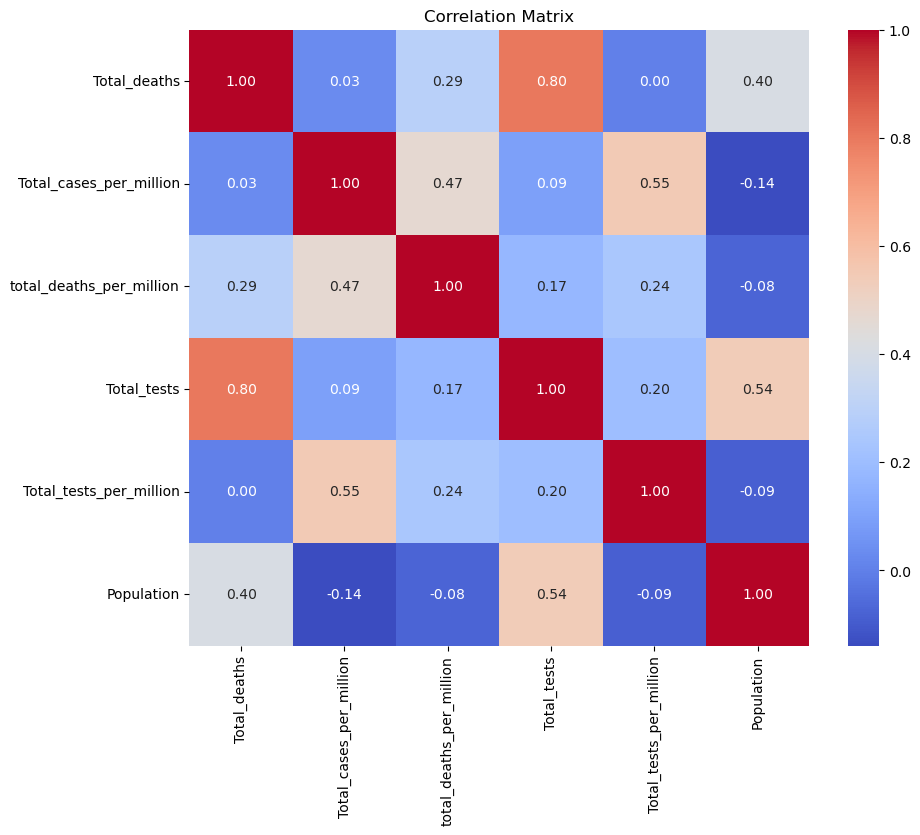

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
import numpy as np
import statsmodels.api as sm

# Assuming df_worldometer_data is your DataFrame containing the data
# Replace NaN values with a suitable method, such as mean or median
df_worldometer_data.fillna(df_worldometer_data.mean(), inplace=True)

# Replace infinite values with NaN
df_worldometer_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df_worldometer_data.dropna(inplace=True)

# Now you can proceed to fit your model
X = df_worldometer_data[['Total_tests_per_million', 'Total_cases_per_million']]
y = df_worldometer_data['total_deaths_per_million']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.212
Model:                                  OLS   Adj. R-squared:                  0.205
Method:                       Least Squares   F-statistic:                     30.73
Date:                      Sun, 31 Mar 2024   Prob (F-statistic):           1.52e-12
Time:                              17:07:30   Log-Likelihood:                -1954.3
No. Observations:                       231   AIC:                             3915.
Df Residuals:                           228   BIC:                             3925.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df_worldometer_data is your DataFrame containing the data
# Make sure to replace the column names accordingly if they are different
X = df_worldometer_data[['Total_tests_per_million', 'Total_cases_per_million']]
y = df_worldometer_data['total_deaths_per_million']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", model.intercept_)
print(f"Coefficients: Total_tests_per_million and Total_cases_per_million.")
print("Coefficient values:", model.coef_)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Intercept: 682.8778495115891
Coefficients: Total_tests_per_million and Total_cases_per_million.
Coefficient values: [-1.03314179e-05  3.10881475e-03]
Mean Squared Error: 1048537.0273517629
